In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 12 21:45:43 2021

@author: pmarc
Résolution Problème L10 - #1 par Pierre-Marc Juneau, 15 avril 2021
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics as mt
import statsmodels.api as sm
import scipy.stats as sts


In [2]:



donnee = pd.read_csv('../Fichiers/DonneesMarketingv0r3.csv')
stats=donnee.describe()
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)
donnee=donnee.dropna()
donnee = donnee.drop('Date', 1)



/tmp/ipykernel_160562/3391194563.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  donnee = donnee.drop('Date', 1)


11.550429267134342
12.34661118139832
9.752530990581386
11.401050981741767
9.16065445411521


TypeError: at least two inputs are required; got 1.

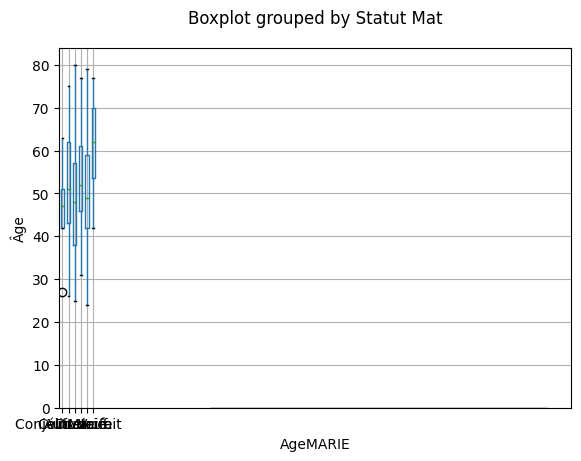

In [20]:

Q1 = donnee["Âge"].quantile(0.25)
Q3 = donnee["Âge"].quantile(0.75)
IQR = Q3 - Q1

X = donnee[(donnee["Âge"] > (Q1 - 1.5 * IQR)) & (donnee["Âge"] < (Q3 + 1.5 * IQR))]

ax = X.boxplot(by="Statut Mat", column="Âge")
ax.set_xlabel('')
ax.set_ylabel("Âge")
plt.title('')


AgeCONJFAIT=X[(X["Statut Mat"]=="Conjoint de fait")]["Âge"].values.reshape(-1,1)
AgeCELI=X[(X["Statut Mat"]=="Célibataire")]["Âge"].values.reshape(-1,1)
AgeDIVORCE=X[(X["Statut Mat"]=="Divorcé")]["Âge"].values.reshape(-1,1)
AgeMARIE=X[(X["Statut Mat"]=="Marié")]["Âge"].values.reshape(-1,1)
AgeVEUF=X[(X["Statut Mat"]=="Veuf")]["Âge"].values.reshape(-1,1)

print(AgeCONJFAIT.std())
print(AgeCELI.std())
print(AgeDIVORCE.std())
print(AgeMARIE.std())
print(AgeVEUF.std())

ax=plt.hist(AgeCELI,density=True, bins = 10, color = 'blue', edgecolor = 'black')
plt.xlabel("AgeMARIE")

"Tests d'hypothèses"
#print(type(AgeCONJFAIT))
pvalue1=sts.f_oneway(AgeCONJFAIT,AgeCELI,AgeDIVORCE,AgeMARIE,AgeVEUF)
pvalue2=sts.ttest_ind(AgeCONJFAIT,AgeDIVORCE)
pvalue3=sts.ttest_ind(AgeVEUF,AgeDIVORCE)

pvalue4=sts.f_oneway(np.array([0]).reshape(-1,1), np.array([1,21]).reshape(-1,1))

print(pvalue1)
print(pvalue2)
print(pvalue3)
print("[pvalue4]", pvalue4)